In [ ]:
# This isn't something that I normally do, but here is a helper file I've made for you for the Python version of your A2 where you try to create a line graph to show data change over time. - Dr. Mead - 09162023

In [ ]:
# I'm using the Elite Party Services use case files as an exmple. Just change the name to your use case files where appropriate for loading data files.

In [1]:
import pandas as pd # For data processing
import numpy as np # For linear algebra
import matplotlib.pyplot as plt # For plotting
import piplite
await piplite.install("openpyxl")

In [2]:
# get the exact path of your present working directory
pwd

'/drive'

In [18]:
# show the contents of your directory
import os
os.listdir('/drive')

['1 - Elite Party Services - M1 - Initial dataset.xlsx',
 '1 - Elite Party Services - M2 - Change Over Time.xlsx',
 'tester-M2.ipynb',
 'notebooks',
 'data',
 'README.md']

In [19]:
# Load your M1 XLSX file
M1 = pd.ExcelFile('1 - Elite Party Services - M1 - Initial dataset.xlsx')

In [20]:
# Get a list of the sheet names in M1
M1.sheet_names

['1 - Elite Party Services - M1', 'Data Dictionary']

In [23]:
# Save sheet one of M1 to a variable
M1_Data = pd.read_excel(M1, '1 - Elite Party Services - M1')

In [24]:
# Look at the M1_Data
M1_Data

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7
0,1,4,1,9,23,4,1,1
1,2,2,2,5,24,4,2,8
2,3,4,1,9,19,3,9,1
3,4,4,1,9,20,3,2,8
4,5,3,1,6,24,4,9,1
...,...,...,...,...,...,...,...,...
148,149,2,2,8,21,3,1,4
149,150,4,1,4,33,4,3,1
150,151,3,2,5,35,3,3,4
151,152,4,1,4,24,2,2,4


In [50]:
# Save sheet two of M1 to a variable
M1_DD = pd.read_excel(M1, 'Data Dictionary')

In [34]:
# Look at the M1_DD (Note: the DD sheet, each Variable and its codes are contained in its own row. If it confuses you, try looking at the contents of each row one at a time using the next code block below.)
M1_DD

,ID,ResponseID,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Q1,Length living in current residence,Less than 1 year (1),1 to 5 years (2),6 to 10 years (3),10 years or more (4),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Q2,Gender,Male (1),Female (2),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Q3,Ethnicity,Ameridan Indian (1),African American (2),Mexican American (3),Other Hispanic (4),Asian (5),Southeast Asian (6),Pacific Islander (7),Filipino (8),Multiple Ethnicities (9),White (10),Other/Not Stated (11),International (12),Prefer not to say (13)
3,Q4,Age,(number entered or left blank),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Q5,Education,Some high school (1),High school diploma (2),Some college (3),4-year undergraduate degree (4),Master's degree or higher (5),Doctorate (6),NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Q6,Annual Income,"$39,999 or less (1)","$40,000 to $49,999 (2)","$50,000 to $59,999 (3)","$60,000 to $69,999 (4)","$70,000 to $79,999 (5)","$80,000 to $89,999 (6)","$90,000 to $99,999 (7)","$100,000 or more (8)",Prefer not to disclose (9),NaN,NaN,NaN,NaN
6,Q7,Religion,Christianity/Catholicism (1),Islam (2),Hinduism (3),Catholicism (4),Buddhism (5),Judaism (6),Mormonism (7),No religion (8),Other (9),NaN,NaN,NaN,NaN


In [51]:
# Show a list of the response options and their codes for each variable one at a time. The initial code in this block is for showing the first row in the DD, which is referred to as row 0 in Python.  You can ignore the "nan" because it just means that that was an empty cell in the original excel sheet.
M1_DD.loc[0, :].values.tolist()

['Q1',
 'Length living in current residence',
 'Less than 1 year (1)',
 '1 to 5  years (2)',
 '6 to 10 years (3)',
 '10 years or more (4)',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [52]:
# Show a list of the response options and their codes for each variable one at a time. The initial code in this block is for showing the second row in the DD, which is referred to as row 1 in Python. You can ignore the "nan" because it just means that that was an empty cell in the original excel sheet.
M1_DD.loc[1, :].values.tolist()

['Q2',
 'Gender',
 'Male (1)',
 'Female (2)',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [53]:
# Load your M2 XLSX file
M2 = pd.ExcelFile('1 - Elite Party Services - M2 - Change Over Time.xlsx')

In [54]:
# Get a list of the sheet names in M2
M2.sheet_names

['1 - Elite Party Services - M2', 'Data Dictionary']

In [55]:
# Save sheet one of M2 to a variable
M2_Data = pd.read_excel(M2, '1 - Elite Party Services - M2')

In [56]:
# Look at M2_Data
M2_Data

,ID,Date
0,1,2022-08-18
1,2,2022-05-01
2,3,2022-02-19
3,4,2022-11-05
4,5,2022-09-29
...,...,...
148,149,2022-08-25
149,150,2022-02-25
150,151,2022-03-17
151,152,2022-12-07


In [57]:
# Save sheet two of M2 to a variable
M2_DD = pd.read_excel(M2, 'Data Dictionary')

In [58]:
# Look at M2_DD
M2_DD

,ID,ResponseID,Unnamed: 2
0,Date,Date,mm/dd/yyyy


In [60]:
# Get a list of the column names in M1_Data
M1_Data.columns

Index(['ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7'], dtype='object')

In [62]:
# Get the descriptive statistics for the Age (Q4) variable
M1_Data['Q4'].describe() # Show the summary statistics

count    153.00000
mean      25.69281
std        4.37138
min       18.00000
25%       22.00000
50%       25.00000
75%       29.00000
max       39.00000
Name: Q4, dtype: float64

In [76]:
# Merge M1 and M2 on the common ID column and then look at it
M1_M2 = pd.merge(M1_Data, M2_Data, on="ID")
print(M1_M2)

      ID  Q1  Q2  Q3  Q4  Q5  Q6  Q7       Date
0      1   4   1   9  23   4   1   1 2022-08-18
1      2   2   2   5  24   4   2   8 2022-05-01
2      3   4   1   9  19   3   9   1 2022-02-19
3      4   4   1   9  20   3   2   8 2022-11-05
4      5   3   1   6  24   4   9   1 2022-09-29
..   ...  ..  ..  ..  ..  ..  ..  ..        ...
148  149   2   2   8  21   3   1   4 2022-08-25
149  150   4   1   4  33   4   3   1 2022-02-25
150  151   3   2   5  35   3   3   4 2022-03-17
151  152   4   1   4  24   2   2   4 2022-12-07
152  153   3   1   5  21   3   1   1 2022-11-06

[153 rows x 9 columns]


In [78]:
# Creeate a new data frame where you just use the Date and the Age column
Age_Date = pd.DataFrame(M1_M2, columns=['Date', 'Q4'])

In [79]:
# Look at it
Age_Date

,Date,Q4
0,2022-08-18,23
1,2022-05-01,24
2,2022-02-19,19
3,2022-11-05,20
4,2022-09-29,24
...,...,...
148,2022-08-25,21
149,2022-02-25,33
150,2022-03-17,35
151,2022-12-07,24


In [92]:
# Group the data by average Age by Date
Ages_grouped_by_date = Age_Date.groupby(Age_Date.Date)['Q4'].mean()

In [93]:
# Look at it
Ages_grouped_by_date

Date
2022-01-02    29.0
2022-01-07    22.0
2022-01-08    25.0
2022-01-09    27.0
2022-01-17    24.0
              ... 
2022-12-23    27.0
2022-12-25    21.0
2022-12-26    29.0
2022-12-29    26.0
2022-12-31    25.0
Name: Q4, Length: 125, dtype: float64

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

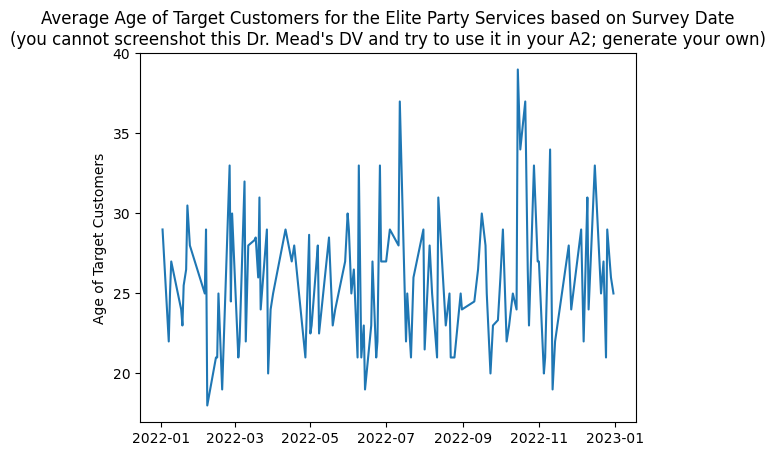

In [101]:
# Create the DV based on the new data frame wherein you grouped the average ages by date
plt.plot(Ages_grouped_by_date)
plt.xticks
plt.ylabel("Age of Target Customers")
plt.title("Average Age of Target Customers for the Elite Party Services based on Survey Date\n(you cannot screenshot this Dr. Mead's DV and try to use it in your A2; generate your own)") # Cutomize your title here to reflect whatever your use case it (remember, this example is using the ELite Party Services use case).
plt.savefig("Average Age based on Survey Date - Elite Party Services-Python.png") # To save the DV to a file. Edit the filename to your team's use case title.
plt.plot
# Experiment ways to customize your chart here: https://www.python-graph-gallery.com/line-chart/
# Every time you run the savefig code, it will overwrite your previous save, unless you change the filename; if you don’t care that you are overwriting, then just keep it the same. Be sure to use the best version of your DV in your reports.
# Download and insert your .png or .jpg into the A2 template and write some statements of data insights that the DV reveals. In your statements of data insights, also include you should also mention the average age from the descriptive statistics output above.

In [ ]:
# Next, try to do the same thing in R. You can search Google for documentation for each of the same things that you've done above, such as "R Get a list of the sheet names in an excel file"